In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [2]:
result = Results(varying_param="h", range=[0, 0.1, 1])
params = ModelParameters(model = "blume", var_range=(1, 4), step=0.01, tol=1e-9, use_prev=True, temperature=1.4, chi=8, coupling=0)
result.get(params, sweeping_param= "temperature")

h=0: 100%|██████████| 300/300 [00:13<00:00, 22.58it/s]


Saving data in folder: '24-05 16:16'
Done 



h=0.1: 100%|██████████| 300/300 [00:07<00:00, 41.03it/s]


Saving data in folder: '24-05 16:16'
Done 



h=1: 100%|██████████| 300/300 [00:05<00:00, 52.08it/s]


Saving data in folder: '24-05 16:16'
Done 



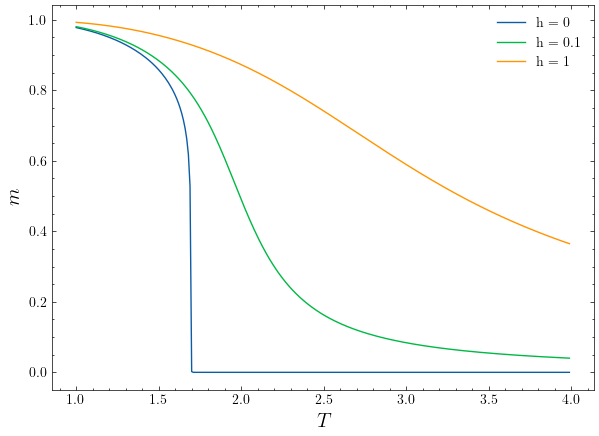

In [6]:
plt.figure(figsize = (7, 5))
for h in [0, 0.1, 1]:
    data = read("24-05 16:16", f"h{h}")
    plt.plot(data["temperatures"], compute(Prop.m, data), label = f"h = {h}")
plt.ylabel("$m$", fontsize =15)
plt.xlabel("$T$", fontsize=15)
plt.legend()
plt.show()

In [18]:
result = Results(varying_param="chi", range=[4, 8, 24])
params = ModelParameters(model = "blume", var_range=(0.7, 1.05), step=0.0005, tol=1e-9, use_prev=True, temperature=1.4, h=0)
result.get(params, sweeping_param= "coupling")

chi=4: 100%|██████████| 701/701 [02:54<00:00,  4.02it/s]


Saving data in folder: '01-06 13:15'
Done 



chi=8: 100%|██████████| 701/701 [03:21<00:00,  3.47it/s]


Saving data in folder: '01-06 13:15'
Done 



chi=24: 100%|██████████| 701/701 [26:33<00:00,  2.27s/it]   


Saving data in folder: '01-06 13:15'
Done 



In [28]:
result = Results(varying_param="chi", range=[4, 8, 24])
params = ModelParameters(model = "blume", var_range=(0.7, 1.05), step=0.0005, tol=1e-11, use_prev=True, temperature=1.4, h=0.5e-5)
result.get(params, sweeping_param= "coupling")

chi=4: 100%|██████████| 701/701 [04:20<00:00,  2.69it/s]


Saving data in folder: '01-06 17:02'
Done 



chi=8:  16%|█▋        | 114/701 [00:10<00:54, 10.86it/s]


KeyboardInterrupt: 

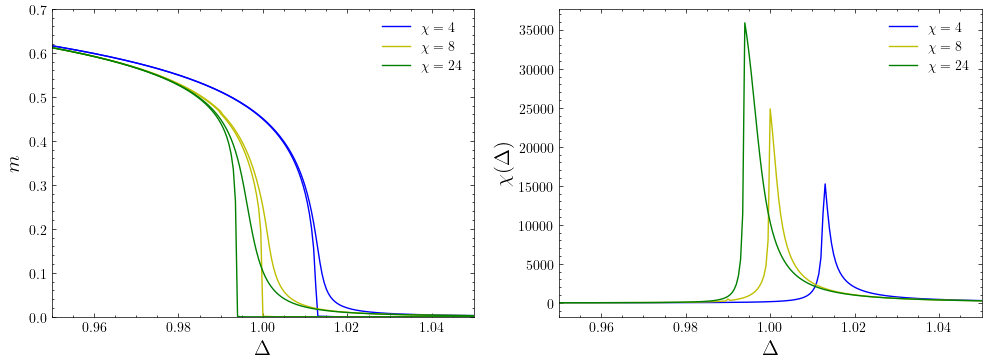

In [37]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(12)
colors = ["b", "y", "g"]


for idx, chi in enumerate([4, 8, 24]):

    data_mag = read("01-06 17:02", f"chi{chi}") if chi == 4 else read("01-06 16:07", f"chi{chi}")
    data = read("01-06 13:15", f"chi{chi}")
    
    ax1.plot(data["couplings"], compute(Prop.m, data), color = colors[idx], label = f"$\chi = {chi}$")
    ax1.plot(data_mag["couplings"], compute(Prop.m, data_mag), color = colors[idx])
    ax1.set(xlim=(0.95, 1.05), ylim=(0, 0.7))
    ax1.set_ylabel("$m$", fontsize =15)
    ax1.set_xlabel("$\Delta$", fontsize =15)

    mag_sus = [(el2 - el1) / 10e-6 for el1, el2 in zip(compute(Prop.m, data), compute(Prop.m, data_mag))]
    ax2.plot(data["couplings"], mag_sus, label = f"$\chi = {chi}$", color = colors[idx])
    ax2.set(xlim=(0.95, 1.05))
    ax2.set_ylabel("$\chi(\Delta)$", fontsize =15)
    ax2.set_xlabel("$\Delta$", fontsize =15)


ax1.legend(loc = "upper right")
ax2.legend(loc= "upper right")
plt.show()